กำหนดต่า Library Package ที่ต่้องใช้งาน

In [32]:
from pandas_datareader import data as pdr
import pandas as pd
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

กำหนด Function ในการเรียกราคาหุ้นจาก Yahoo Finance

In [22]:
def GetStock(stockname, start, end) :
    return (pdr.get_data_yahoo(stockname, start, end))
symbols=['GC=F','EURUSD=X','JPY=X','THB=x']

ดึงข้อมูล ทองคำ,ยูโรดอลล่าร์,เจแปนดอลล่าร์,และค่าเงินบาท

In [23]:
Dataf1=GetStock(symbols[0],'2016-01-01',pd.to_datetime('now'))
Dataf2=GetStock(symbols[1],'2016-01-01',pd.to_datetime('now'))
Dataf3=GetStock(symbols[2],'2016-01-01',pd.to_datetime('now'))
Dataf4=GetStock(symbols[3],'2016-01-01',pd.to_datetime('now'))

[*********************100%***********************]  1 of 1 downloaded

In [25]:
allstock=pd.concat([Dataf1['Close'], Dataf2['Close'],Dataf3['Close'],Dataf4['Close']],axis=1,
                  keys=[symbols[0],symbols[1],symbols[2],symbols[3]])

In [29]:
allstock.describe()

,GC=F,EURUSD=X,JPY=X,THB=x
count,447.000000,403.000000,403.000000,403.000000
mean,1252.097539,1.100356,110.067345,35.014478
std,56.544741,0.028116,5.091557,0.554060
min,1097.800049,1.039047,99.905998,33.619999
25%,1222.049988,1.075848,105.851497,34.628500
50%,1251.000000,1.106501,111.225998,35.020000
75%,1282.699951,1.122064,113.485500,35.391998
max,1371.099976,1.153403,121.339996,36.325001


In [26]:
alldailyreturn = pd.concat([allstock[symbols[0]].pct_change(1),allstock[symbols[1]].pct_change(1)
                    ,allstock[symbols[2]].pct_change(1),allstock[symbols[3]].pct_change(1)]
                   ,axis=1,keys=[symbols[0],symbols[1],symbols[2],symbols[3]])
allmonthlyreturn = pd.concat([allstock[symbols[0]].pct_change(21),allstock[symbols[1]].pct_change(21)
                    ,allstock[symbols[2]].pct_change(21),allstock[symbols[3]].pct_change(21)]
                   ,axis=1,keys=[symbols[0],symbols[1],symbols[2],symbols[3]])
allannualreturn = pd.concat([allstock[symbols[0]].pct_change(252),allstock[symbols[1]].pct_change(252)
                    ,allstock[symbols[2]].pct_change(252),allstock[symbols[3]].pct_change(252)]
                   ,axis=1,keys=[symbols[0],symbols[1],symbols[2],symbols[3]])

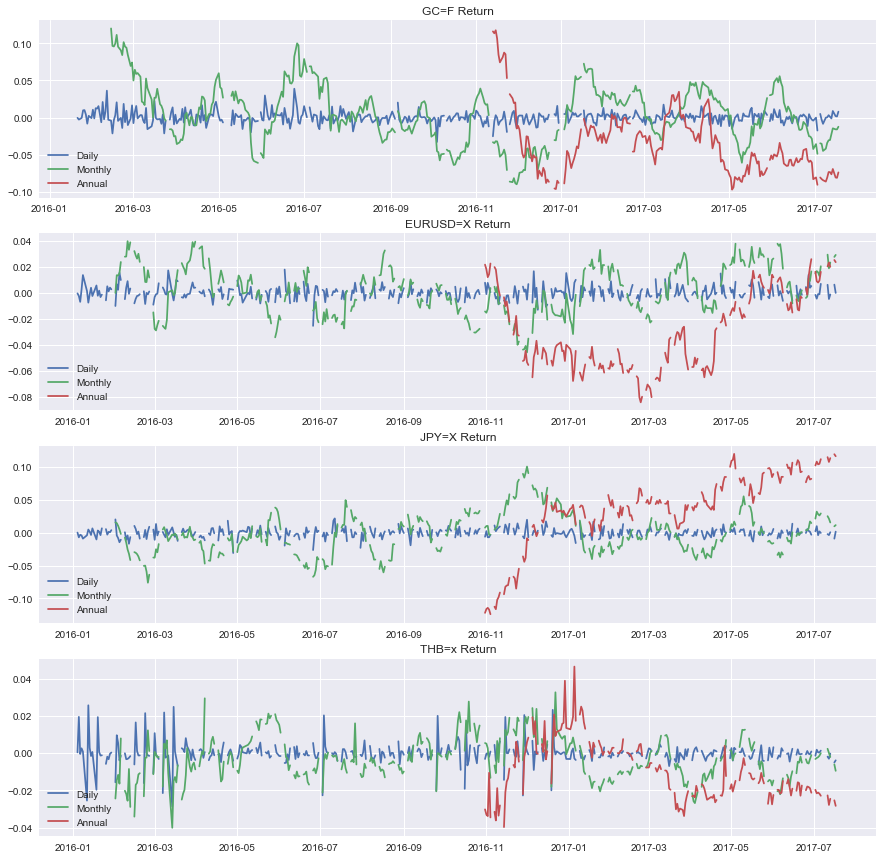

In [122]:
plt.figure(figsize=(15,15))
plt.subplot(411);
plt.plot(alldailyreturn[symbols[0]],label='Daily');
plt.plot(allmonthlyreturn[symbols[0]],label='Monthly');
plt.plot(allannualreturn[symbols[0]],label='Annual');
plt.legend(loc='lower left');
plt.title(symbols[0]+' Return');

plt.subplot(412);
plt.plot(alldailyreturn[symbols[1]],label='Daily');
plt.plot(allmonthlyreturn[symbols[1]],label='Monthly');
plt.plot(allannualreturn[symbols[1]],label='Annual');
plt.legend(loc='lower left');
plt.title(symbols[1]+' Return');

plt.subplot(413);
plt.plot(alldailyreturn[symbols[2]],label='Daily');
plt.plot(allmonthlyreturn[symbols[2]],label='Monthly');
plt.plot(allannualreturn[symbols[2]],label='Annual');
plt.legend(loc='lower left');
plt.title(symbols[2]+' Return');

plt.subplot(414);
plt.plot(alldailyreturn[symbols[3]],label='Daily');
plt.plot(allmonthlyreturn[symbols[3]],label='Monthly');
plt.plot(allannualreturn[symbols[3]],label='Annual');
plt.legend(loc='lower left');
plt.title(symbols[3]+' Return');

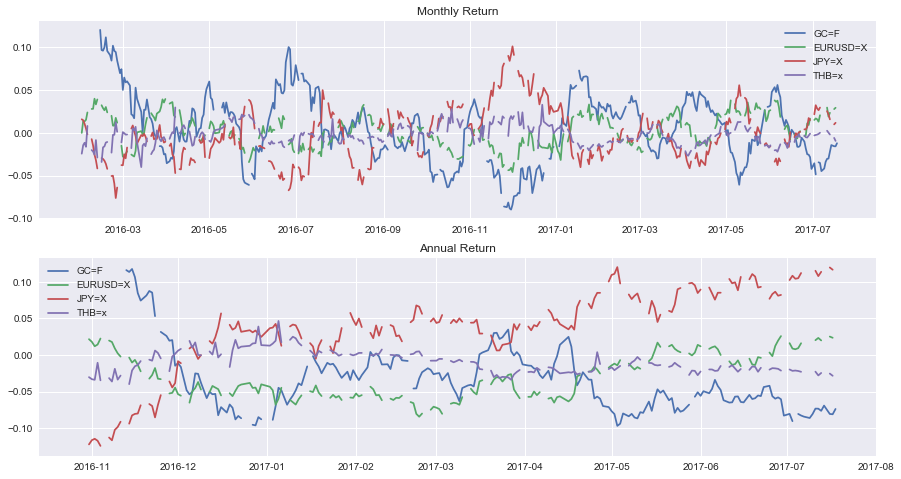

In [124]:
plt.figure(figsize=(15,8))
plt.subplot (211);
plt.plot(allmonthlyreturn);
plt.legend(allstock[symbols]);
plt.title('Monthly Return');
plt.subplot (212);
plt.plot(allannualreturn);
plt.legend(allstock[symbols]);
plt.title('Annual Return');

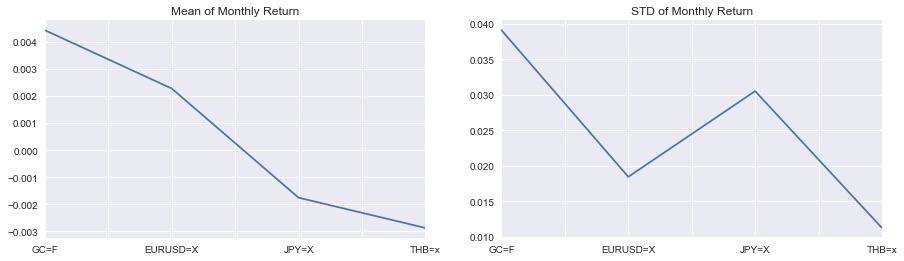

In [135]:
meanallmonthlyreturn = allmonthlyreturn.mean()
stdallmonthlyreturn = allmonthlyreturn.std()

plt.figure(figsize=(15,4));
plt.subplot(1,2,1);
meanallmonthlyreturn.plot();
plt.title('Mean of Monthly Return');
plt.subplot(1,2,2);
stdallmonthlyreturn.plot();
plt.title('STD of Monthly Return');

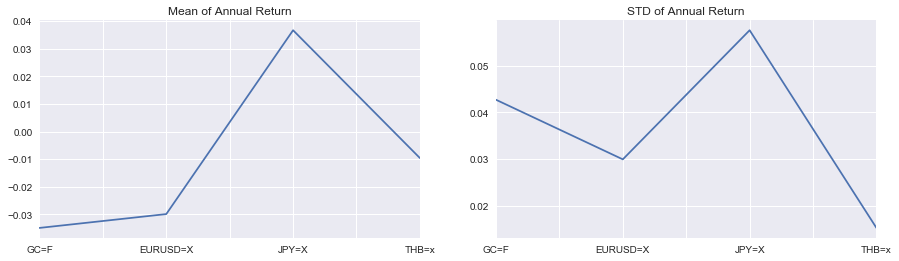

In [137]:
meanallannualreturn = allannualreturn.mean()
stdallannualreturn = allannualreturn.std()

plt.figure(figsize=(15,4));
plt.subplot(1,2,1);
meanallannualreturn.plot();
plt.title('Mean of Annual Return');
plt.subplot(1,2,2);
stdallannualreturn.plot();
plt.title('STD of Annual Return');